**Import Library**

In [ ]:
# Install library rasterio jika belum ada
!pip install rasterio

In [ ]:
import rasterio  # Import library rasterio untuk baca file GeoTIFF
import numpy as np  # Import numpy untuk pengolahan array
import matplotlib.pyplot as plt  # Import matplotlib untuk visualisasi



**Tentukan Lokasi Path**

In [ ]:
# Tentukan path lokasi file GeoTIFF di Google Drive
file_path = '/content/drive/MyDrive/Pelatihan Machine Learning/Pelatihan 1/Day 3/Data/Landsat_8_DKI_JAKPUS_2017/landsat8_dki_jakpus_2017.tif'

**Buka File Geotiff dan Bacan Band RGB**

In [ ]:
#Buka file GeoTIFF dan baca band RGB
with rasterio.open(file_path) as src:
    # Band 4 = Merah, Band 3 = Hijau, Band 2 = Biru
    red = src.read(4).astype('float32')   # SR_B4
    green = src.read(3).astype('float32') # SR_B3
    blue = src.read(2).astype('float32')  # SR_B2



**Normalisasi dengan Min Max**

In [ ]:
# Definisikan fungsi normalisasi min–max
def normalize_minmax(array):
    array = np.nan_to_num(array, nan=0.0)       # Ganti NaN dengan 0 agar tidak error
    min_val = array.min()                       # Ambil nilai minimum array
    max_val = array.max()                       # Ambil nilai maksimum array
    return np.clip((array - min_val) / (max_val - min_val), 0, 1)  # Skalakan ke 0–1


**Normalisasi masing - masing band**

In [ ]:
# Normalisasi band merah
red_norm = normalize_minmax(red)

# Normalisasi band hijau
green_norm = normalize_minmax(green)

# Normalisasi band biru
blue_norm = normalize_minmax(blue)

**Gabungkan menjadi gambar RGB**

In [ ]:
# Gabungkan ketiga band menjadi citra RGB (stack array sepanjang axis ke-3)
rgb_image = np.dstack((red_norm, green_norm, blue_norm))

**Tampilkan Gambar RGB**

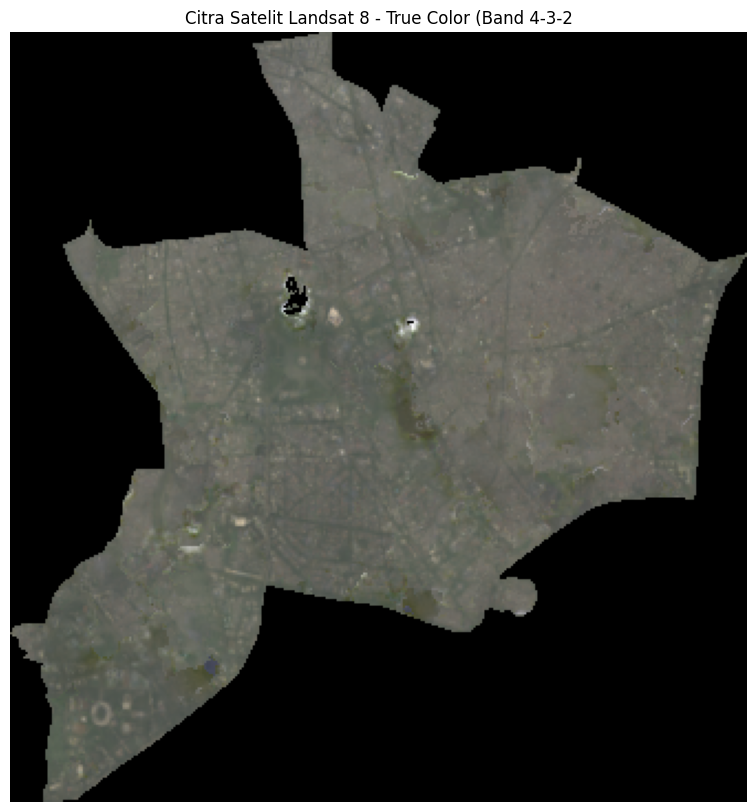

In [ ]:
# Buat kanvas figure berukuran 10x10 inci
plt.figure(figsize=(10, 10))

# Tampilkan citra RGB dengan plt.imshow
plt.imshow(rgb_image)

# Tambahkan judul peta
plt.title('Citra Satelit Landsat 8 - True Color (Band 4-3-2)')

# Hilangkan sumbu X dan Y agar bersih
plt.axis('off')

# Tampilkan hasil visualisasi
plt.show()

**Cek Ukuran Data**

In [ ]:
rgb_image.shape #cek ukuran data

(349, 334, 3)

**Cek isi data**

In [ ]:
import pandas as pd  # Import pandas untuk analisis dan penyimpanan data tabular

# Ambil dimensi array: jumlah baris, kolom, dan band (harusnya 3)
rows, cols, bands = rgb_image.shape

# Flatten jadi 2D array: (rows*cols, 3)
flat_rgb = rgb_image.reshape(rows*cols, bands)

# Buat DataFrame dengan kolom R, G, B
df_rgb = pd.DataFrame(flat_rgb, columns=['Red', 'Green', 'Blue'])

# Tampilkan 10 baris pertama (10 pixel pertama)
print(df_rgb.head(10))


**Menyimpan data RGB ke CSV**

In [ ]:
# Simpan data RGB ke file CSV di Google Drive
df_rgb.to_csv('/content/drive/MyDrive/Pelatihan Machine Learning/Pelatihan 1/Day 3/Result/rgb_data.csv', index=False)

# Konfirmasi penyimpanan berhasil
print("Data RGB berhasil disimpan ke file CSV.")